# 필수 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='malgun gothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

# 데이터 불러오기

In [39]:
df = pd.read_excel('C:/k_digital/source/data/Online_Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [40]:
raw = df

## 데이터 기초 정보 확인

In [41]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

- InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 주문번호
- StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 상품코드
- Description: Product (item) name. Nominal. 상품명
- Quantity: The quantities of each product (item) per transaction. Numeric. 수량
- InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 주문날짜
- UnitPrice: Unit price. Numeric, Product price per unit in sterling. 상품가격
- CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 고객아이디
- Country: Country name. Nominal, the name of the country where each customer resides. 고객거주지역

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- CustomerID에 누락된 값이 존재한다.
- 이는 비회원의 상품구매에 따른 누락으로 추정된다.

In [43]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


- 상품의 수량과 가격의 최솟값에 음수가 나와있다.
- 이는 이상치로 판단하여 제거해주는 것이 좋아 보인다.

In [44]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## Data Cleansing

In [45]:
# 누락된 고객ID 컬럼에 누락행을 제거
df = df[df.CustomerID.notnull()]
len(df)

406829

In [46]:
# Quantity와 UnitPrice 컬럼에 음수 행 제거
df = df[df.Quantity > 0]
df = df[df.UnitPrice > 0]
len(df)

397884

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [48]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [49]:
df.CustomerID = df.CustomerID.astype(np.int32)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


In [50]:
df.CustomerID = df.CustomerID.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 25.2+ MB


- df.CustomerID = pd.to_numeric(df.CustomerID, downcast='integer') # int16

In [51]:
df['Price'] = df.Quantity * df.UnitPrice
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [52]:
# 정제 완료된 데이터 저장
df.to_csv('online_retail.csv', index=False)

## 전체 매출과 국가별 매출 분석

In [53]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic',
       'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community',
       'Bahrain', 'Malta', 'RSA'], dtype=object)

In [54]:
len(df.Country.unique())

37

In [55]:
# 전체 매출 분석
total_revenue = df.Price.sum()
total_revenue

8911407.904

In [19]:
# 국가별 매출
rev_by_countries = df.groupby('Country')['Price'].sum().sort_values()
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              826.740
RSA                        1002.310
Brazil                     1143.600
European Community         1300.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1902.280
Unspecified                2667.070
Malta                      2725.590
USA                        3580.390
Canada                     3666.380
Iceland                    4310.000
Greece                     4760.520
Israel                     7221.690
Poland                     7334.650
Austria                   10198.680
Cyprus                    13590.380
Italy                     17483.240
Denmark                   18955.340
Channel Islands           20450.440
Singapore                 21279.290
Finland                   22546.080
Portugal                  33439.890
Norway                    36165.440
Japan                     37416.370
Sweden              

<AxesSubplot:xlabel='Country'>

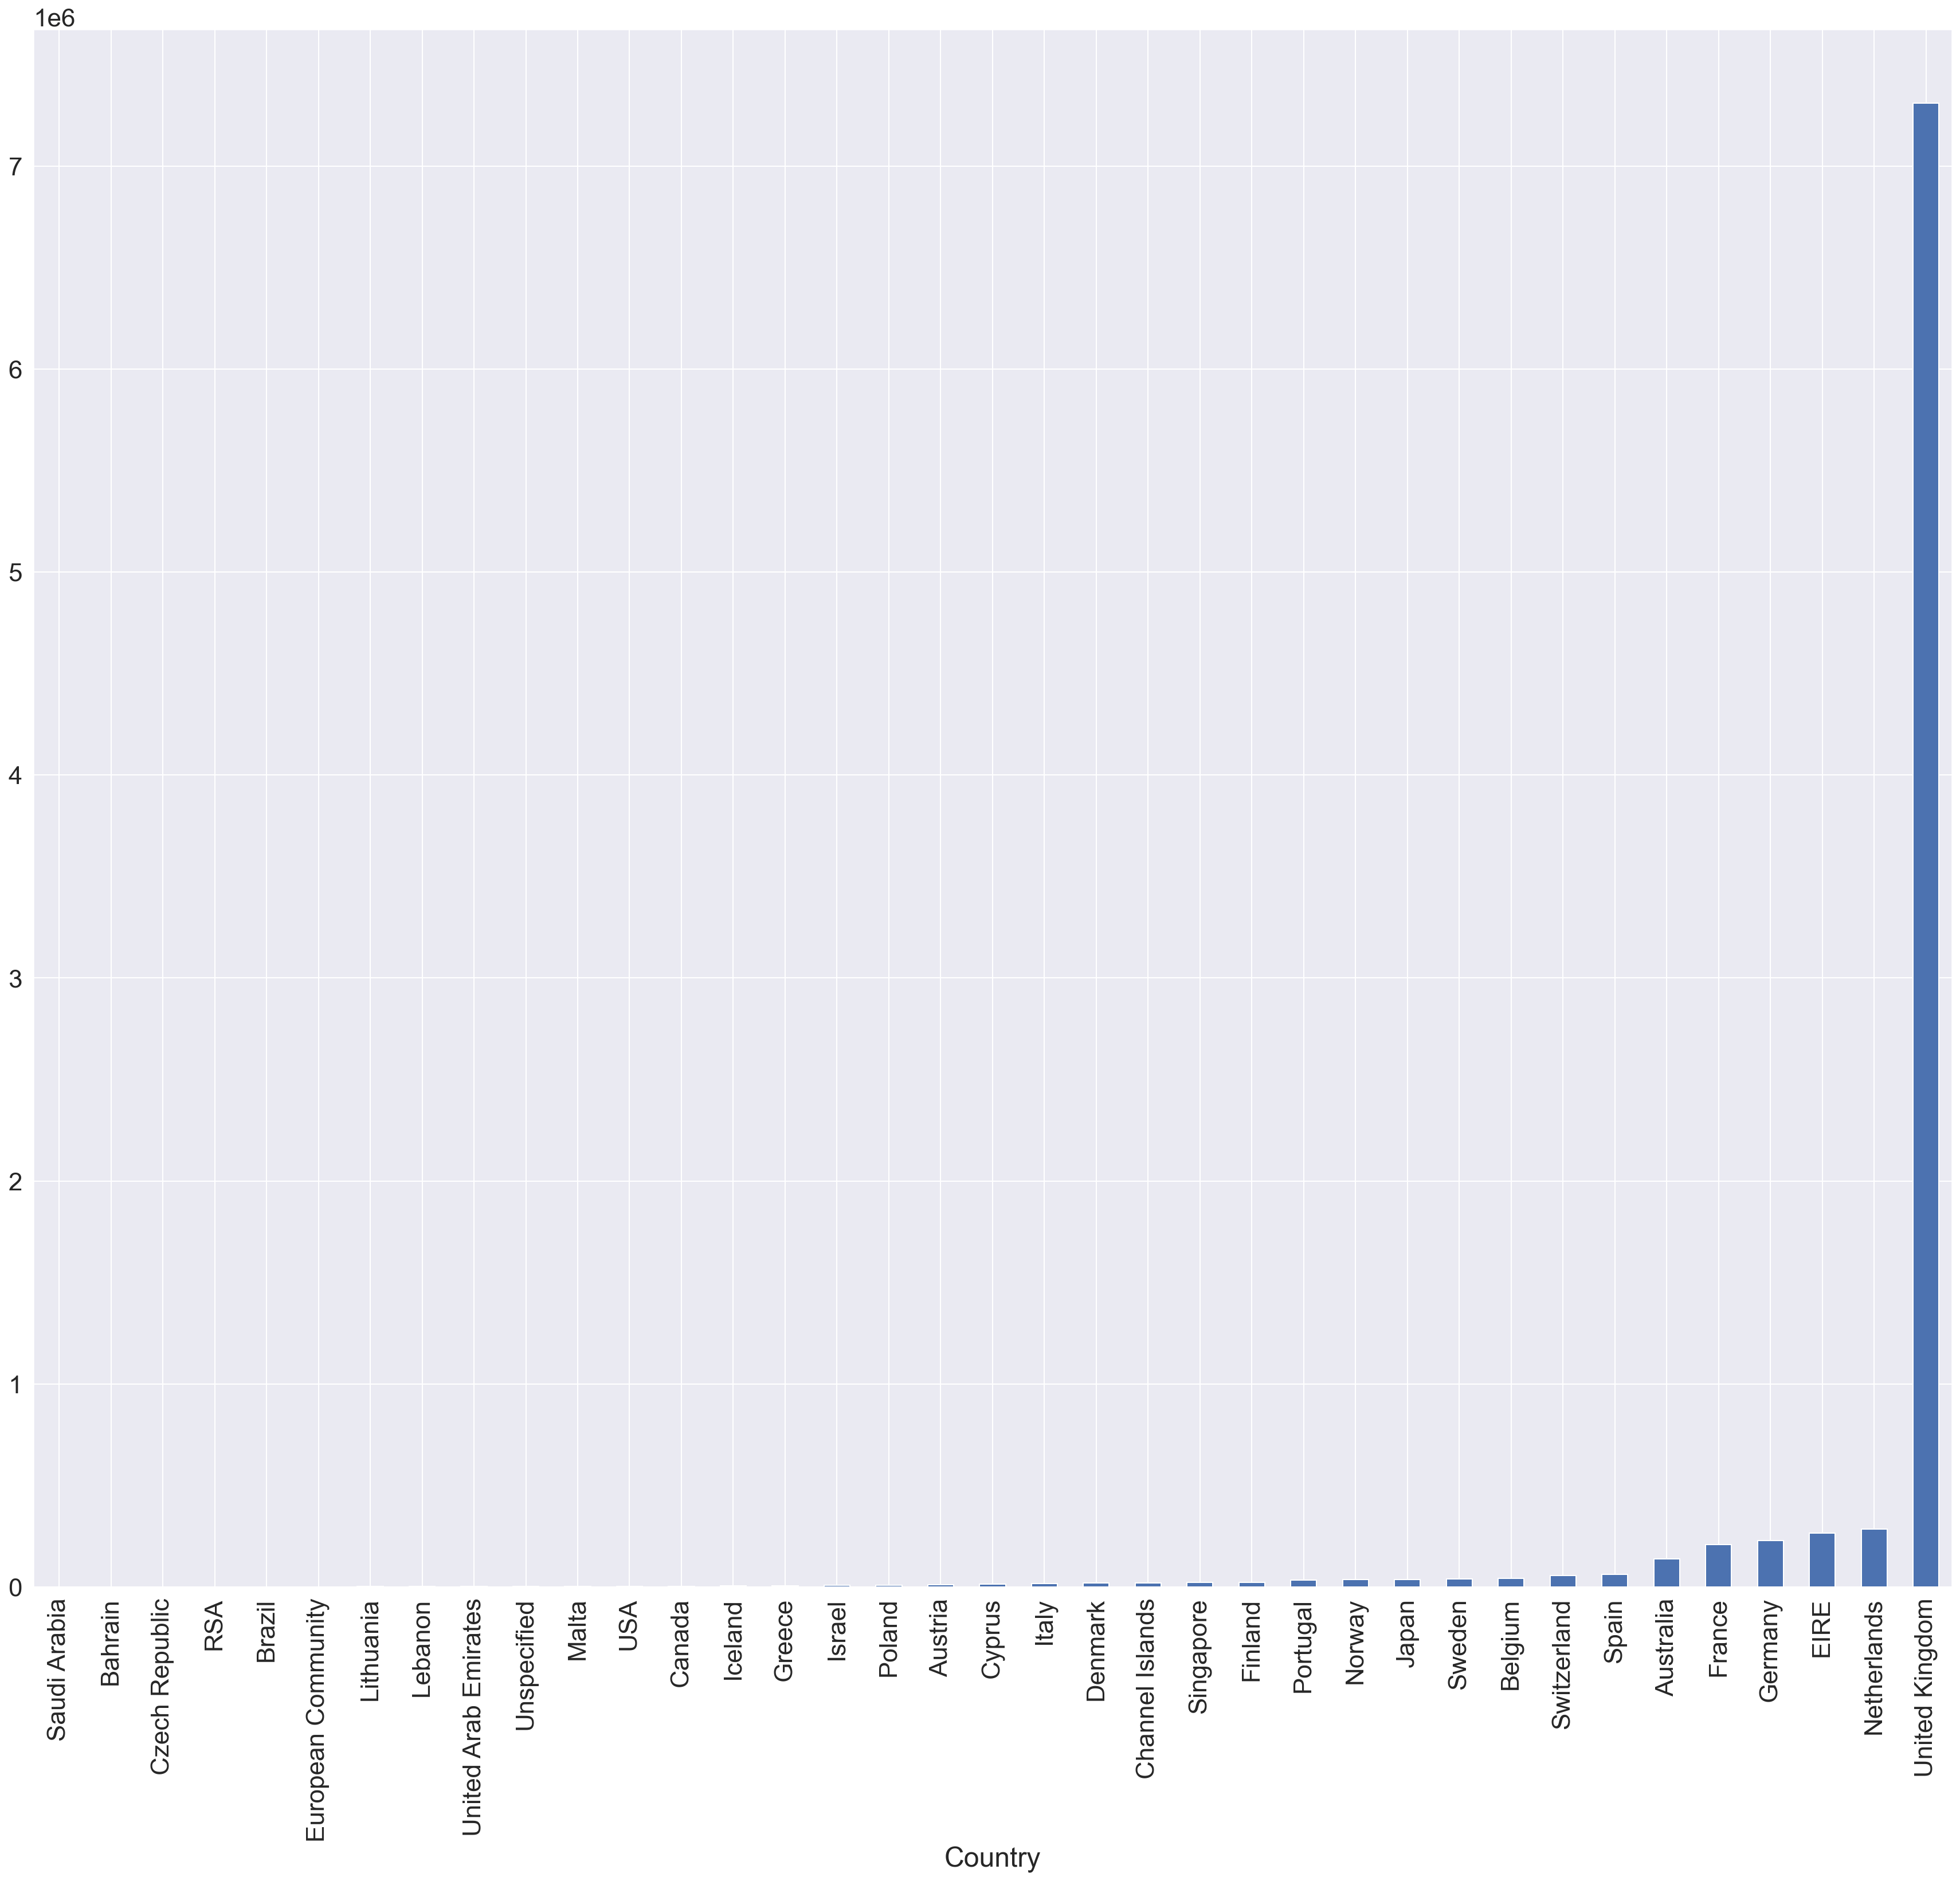

In [56]:
# 국가별 매출 시각화
rev_by_countries.plot(kind='bar')

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Unspecified'),
 Text(10, 0, 'Malta'),
 Text(11, 0, 'USA'),
 Text(12, 0, 'Canada'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Cyprus'),
 Text(19, 0, 'Italy'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Channel Islands'),
 Text(22, 0, 'Singapore'),
 Text(23, 0, 'Finland'),
 Text(24, 0, 'Portugal'),
 Text(25, 0, 'Norway'),
 Text(26, 0, 'Japan'),
 Text(27, 0, 'Sweden'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Switzerland'),
 Text(30, 0, 'Spain'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'France'),
 Text(33, 0, 'Germany'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Netherlands'),
 Text(36, 0, 'United Kingdom')]

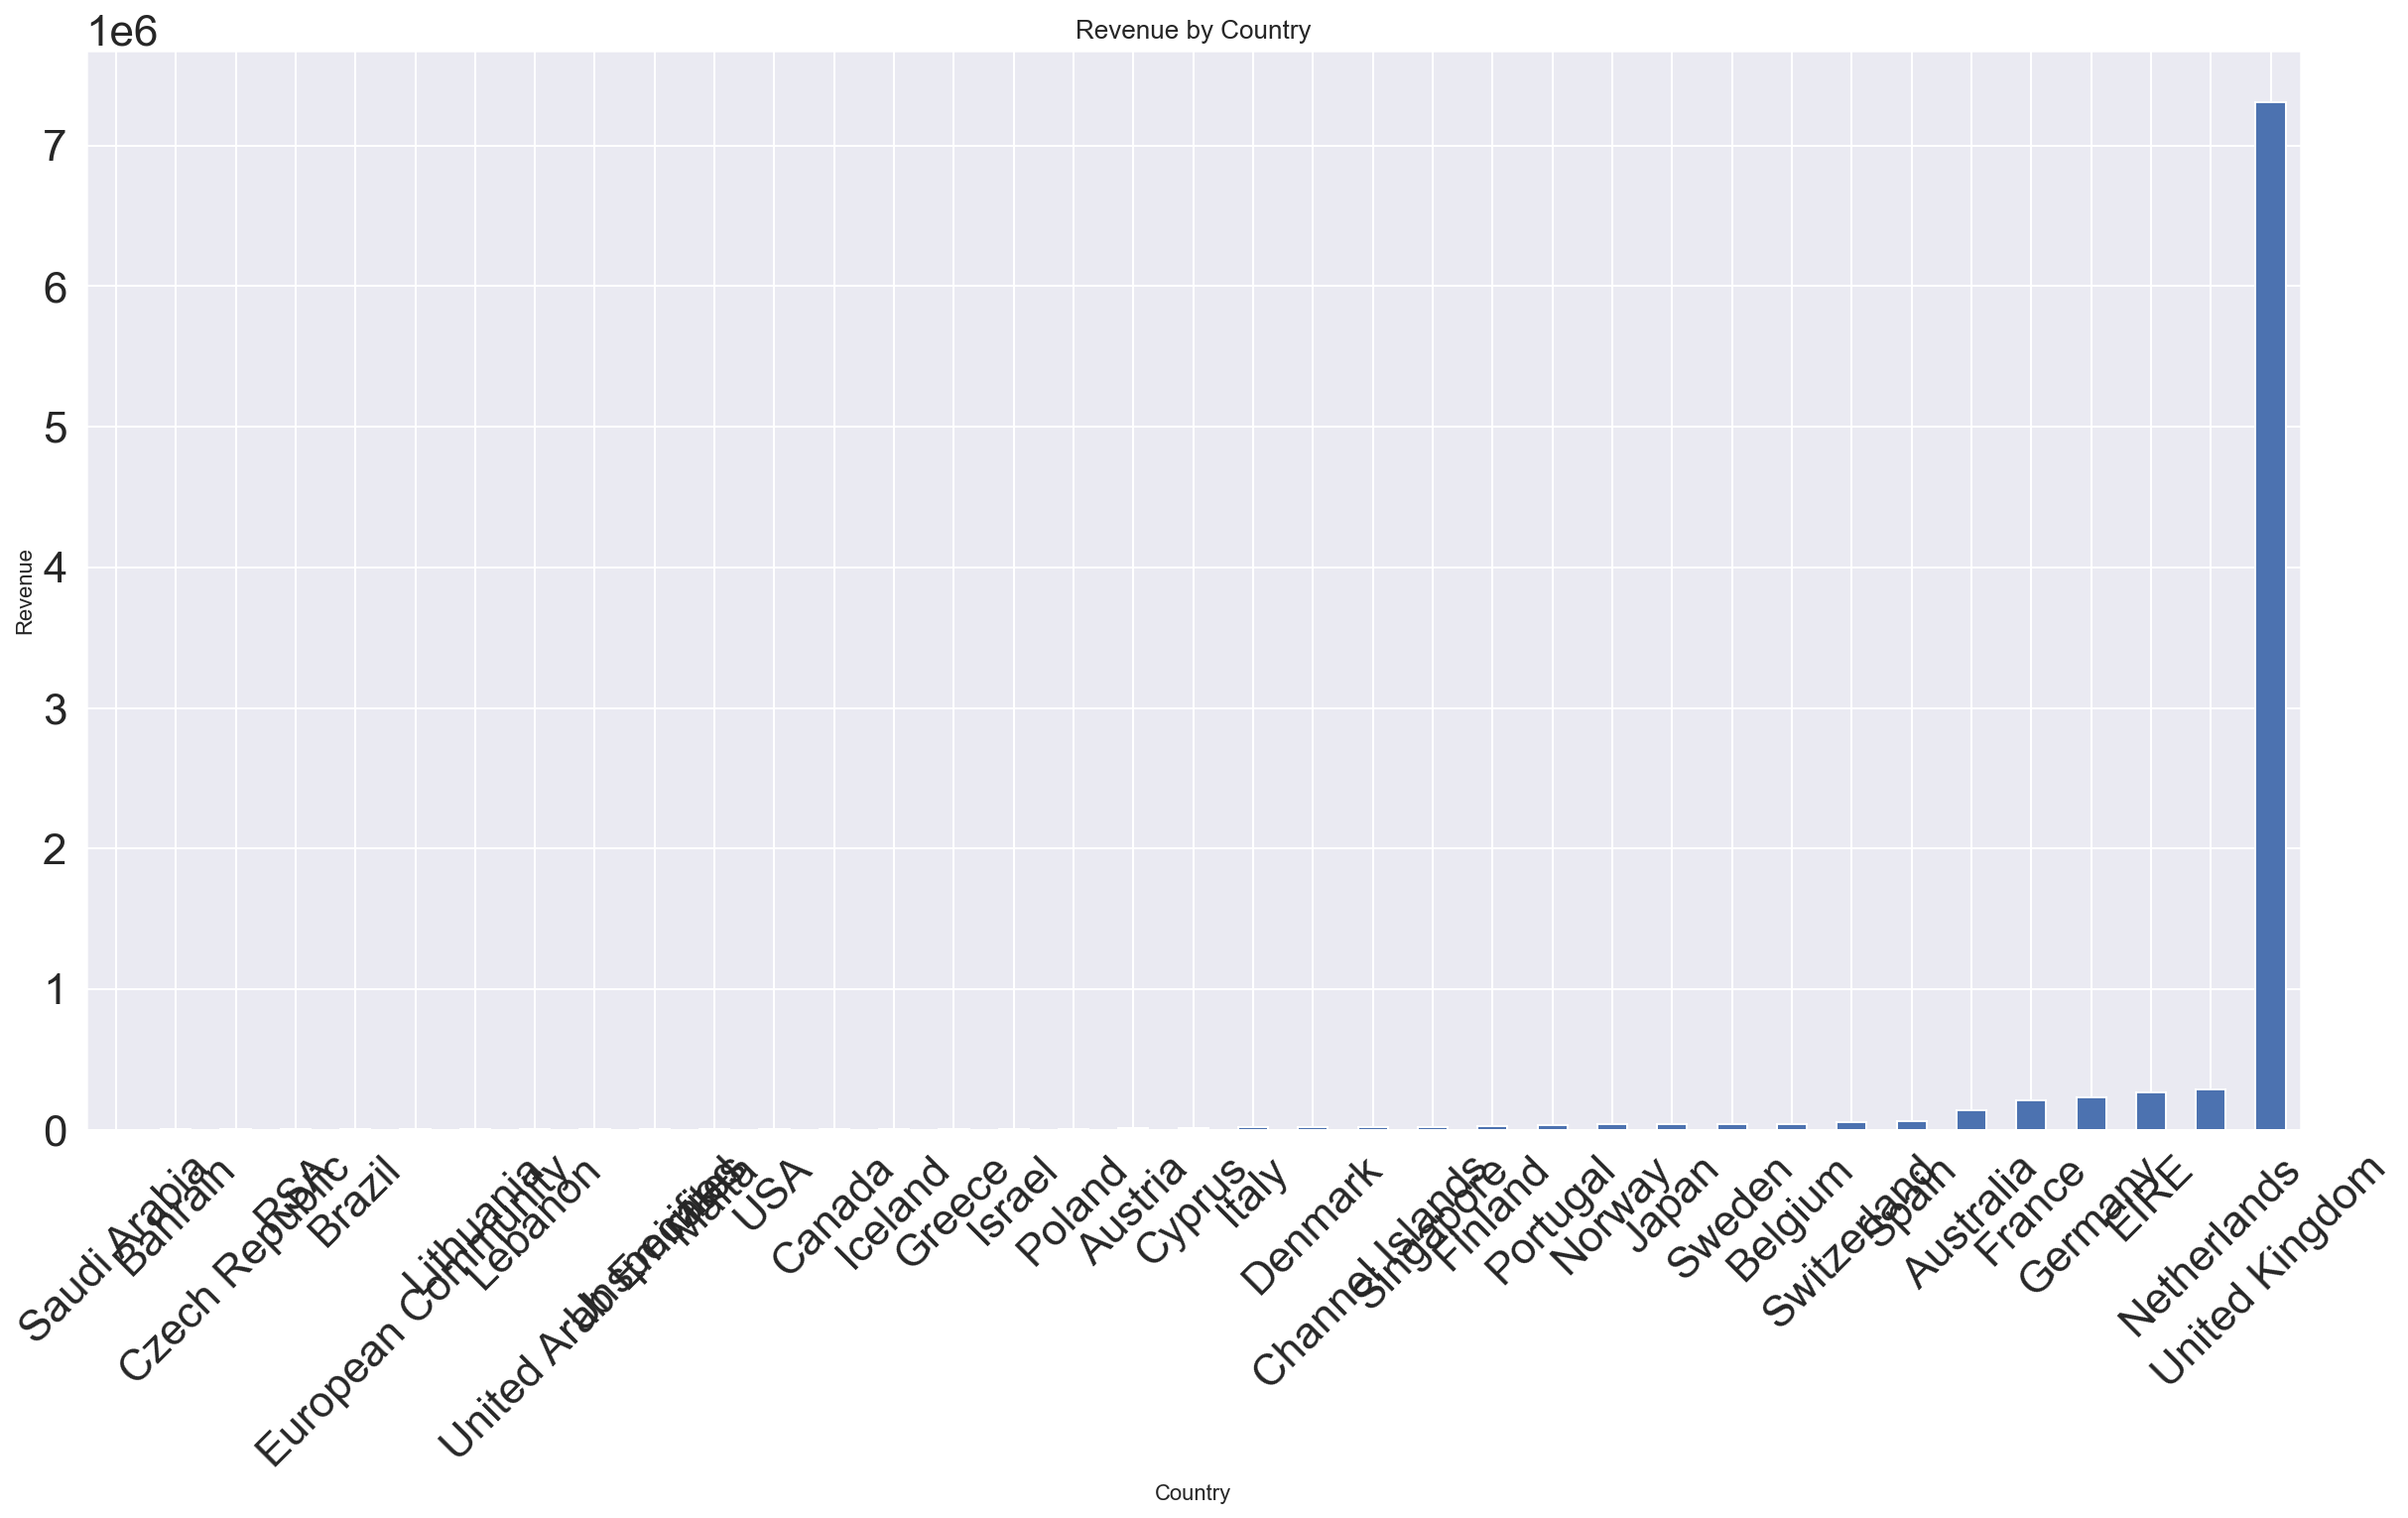

In [57]:
plot=rev_by_countries.plot(kind='bar',figsize=(20,10))
plot.set_xlabel('Country',fontsize=11)
plot.set_ylabel('Revenue',fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels=rev_by_countries.index, rotation=45)

<BarContainer object of 10 artists>

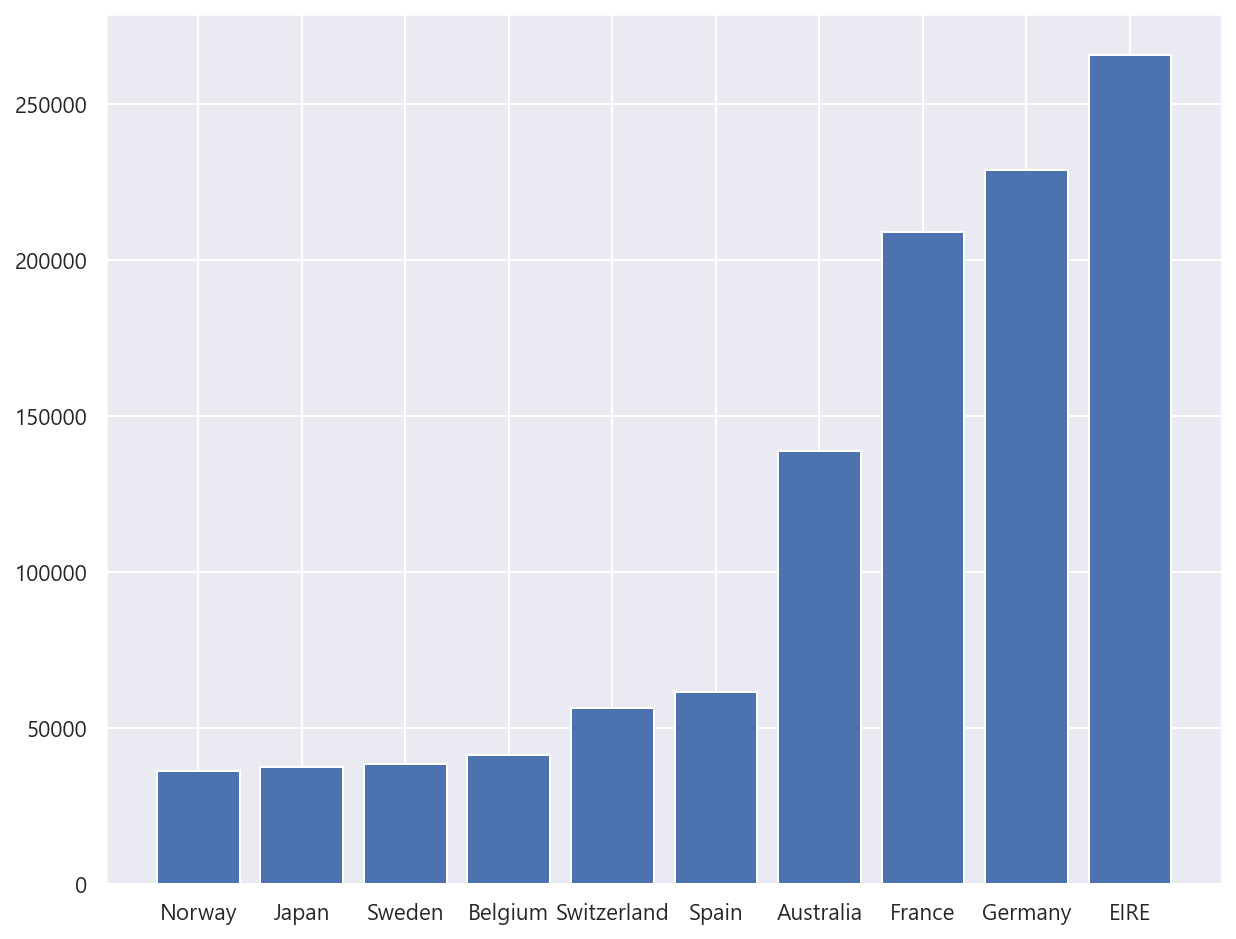

In [26]:
source2 = df.groupby('Country').sum().sort_values('Price')
plt.bar(source2.index[-12:-2], source2['Price'][-12:-2])

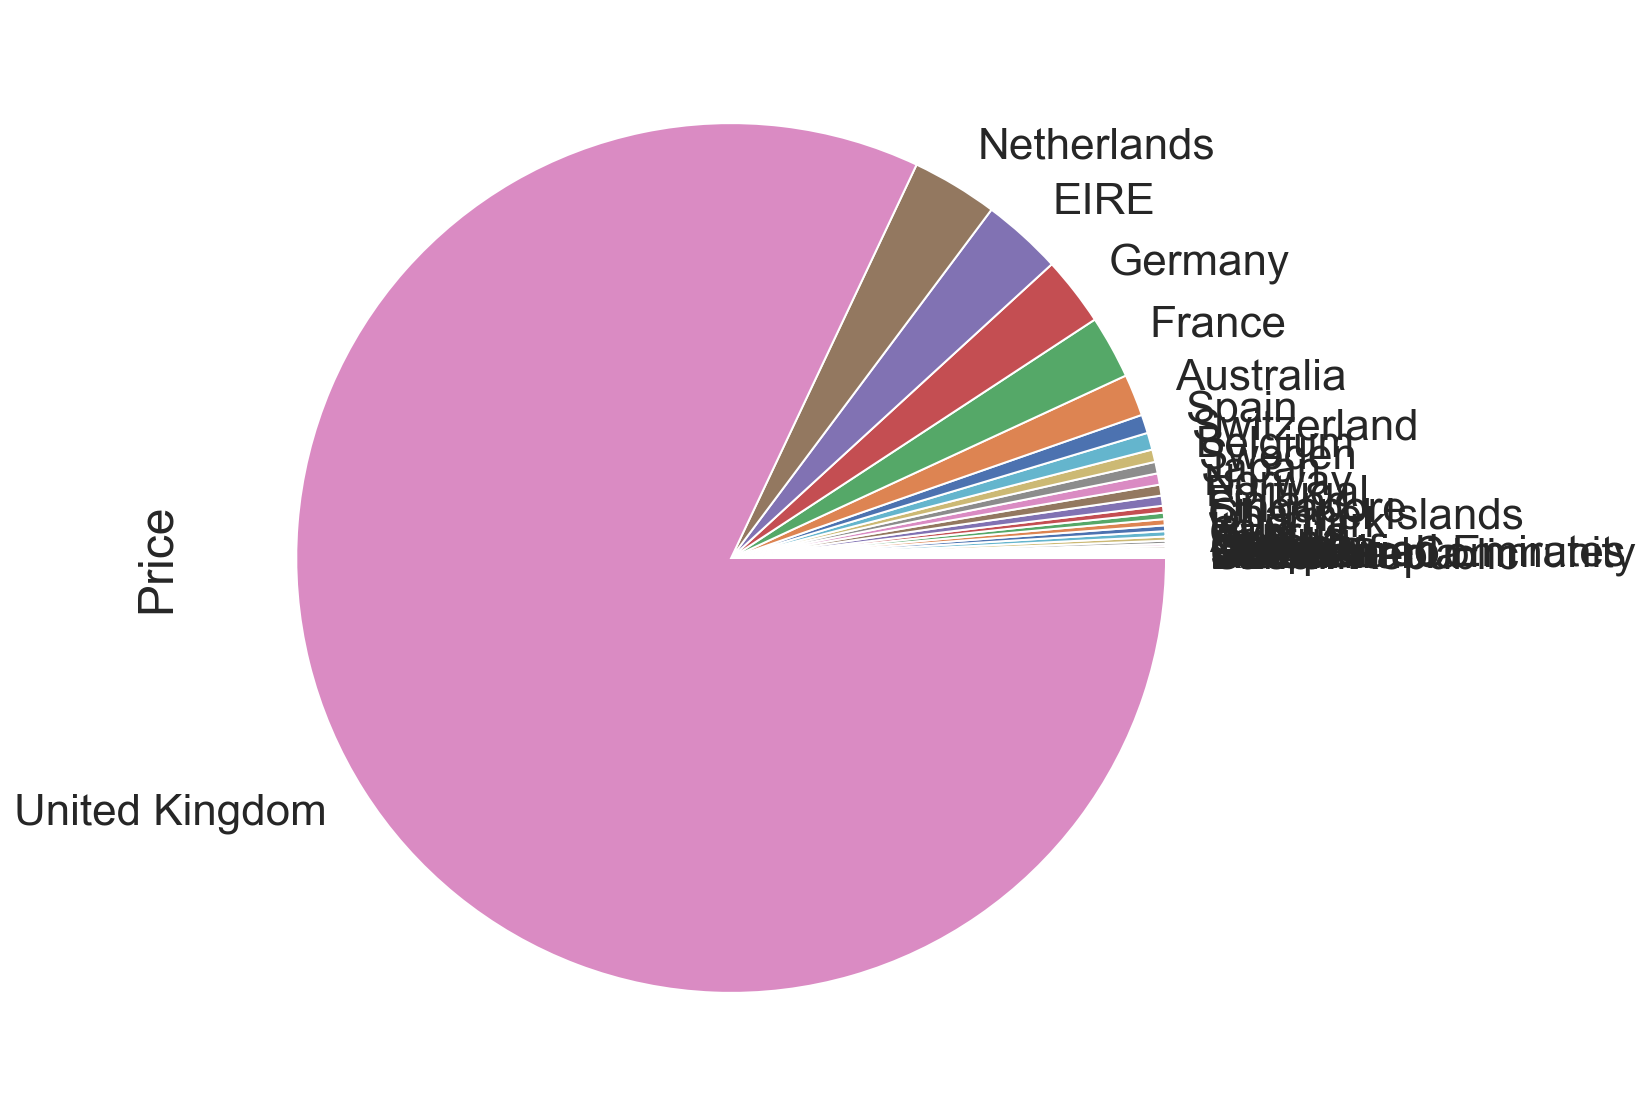

In [58]:
plot=(rev_by_countries/total_revenue).plot(kind='pie',figsize=(20,10))

## 연월별 매출, 요일별 매출

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  category      
 7   Country      397884 non-null  object        
 8   Price        397884 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


In [60]:
df.iloc[0, 4].year

2010

In [61]:
df.iloc[0, 4].month

12

### 연월별 매출

In [62]:
def extract_ym(date):
    year = str(date.year)
    month = date.month
    
    if month < 10:
        month = '0' + str(month)
        
    return year + str(month)

In [35]:
df.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=397884, freq=None)

In [37]:
df.index.groupby(extract_ym)

{<function extract_ym at 0x00000221B16388B0>: [2010-12-01 08:26:00]}

In [63]:
rev_by_ym = df.set_index('InvoiceDate').groupby(extract_ym).sum()[['Price']]
rev_by_ym

,Price
InvoiceDate,
201012,572713.890
201101,569445.040
201102,447137.350
201103,595500.760
201104,469200.361
201105,678594.560
201106,661213.690
201107,600091.011
201108,645343.900


### 요일별 매출

In [29]:
df = df.set_index('InvoiceDate')

In [30]:
d_price = df.groupby(df.index.day_name())['Price'].sum().sort_values()

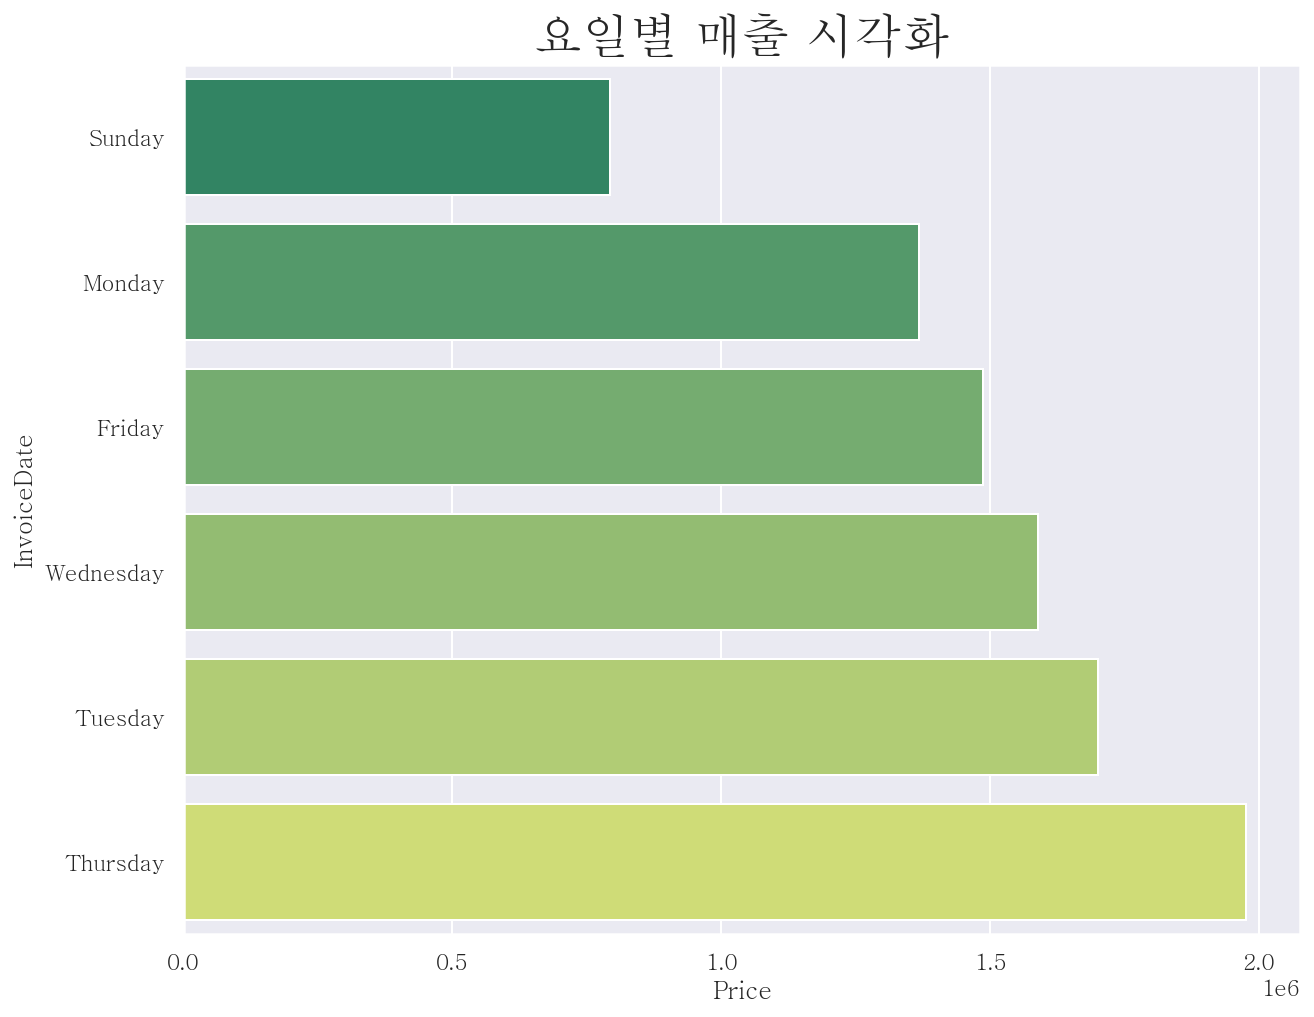

In [31]:
mpl.rcParams['font.family'] = 'batang'
sns.barplot(d_price,d_price.index, palette='summer')
sns.set(font_scale=2)
plt.title('요일별 매출 시각화')
plt.rc('figure', figsize=(30,25))
plt.show()

In [32]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Price
InvoiceDate,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,20.34


## 시간대별 매출, 상위 매출 제품의 월별 판매량 추이

## 고객 고호트(cohort) 분석 

## 우수 고객 찾기

## 몇시에 push 마케팅을 하는게 제일 좋을까?

## 고객별 주문을 가장 많이 하는 시간은?